In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv(r"C:\Users\lenovo\Desktop\tianchi\zhengqi\zhengqi_train.txt", sep='\t')
test = pd.read_csv(r"C:\Users\lenovo\Desktop\tianchi\zhengqi\zhengqi_test.txt", sep='\t')

In [3]:
train.head()

,V0,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V29,V30,V31,V32,V33,V34,V35,V36,V37,target
0,0.566,0.016,-0.143,0.407,0.452,-0.901,-1.812,-2.360,-0.436,-2.114,...,0.136,0.109,-0.615,0.327,-4.627,-4.789,-5.101,-2.608,-3.508,0.175
1,0.968,0.437,0.066,0.566,0.194,-0.893,-1.566,-2.360,0.332,-2.114,...,-0.128,0.124,0.032,0.600,-0.843,0.160,0.364,-0.335,-0.730,0.676
2,1.013,0.568,0.235,0.370,0.112,-0.797,-1.367,-2.360,0.396,-2.114,...,-0.009,0.361,0.277,-0.116,-0.843,0.160,0.364,0.765,-0.589,0.633
3,0.733,0.368,0.283,0.165,0.599,-0.679,-1.200,-2.086,0.403,-2.114,...,0.015,0.417,0.279,0.603,-0.843,-0.065,0.364,0.333,-0.112,0.206
4,0.684,0.638,0.260,0.209,0.337,-0.454,-1.073,-2.086,0.314,-2.114,...,0.183,1.078,0.328,0.418,-0.843,-0.215,0.364,-0.280,-0.028,0.384


In [4]:
test.head()

,V0,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37
0,0.368,0.380,-0.225,-0.049,0.379,0.092,0.550,0.551,0.244,0.904,...,-0.449,0.047,0.057,-0.042,0.847,0.534,-0.009,-0.190,-0.567,0.388
1,0.148,0.489,-0.247,-0.049,0.122,-0.201,0.487,0.493,-0.127,0.904,...,-0.443,0.047,0.560,0.176,0.551,0.046,-0.220,0.008,-0.294,0.104
2,-0.166,-0.062,-0.311,0.046,-0.055,0.063,0.485,0.493,-0.227,0.904,...,-0.458,-0.398,0.101,0.199,0.634,0.017,-0.234,0.008,0.373,0.569
3,0.102,0.294,-0.259,0.051,-0.183,0.148,0.474,0.504,0.010,0.904,...,-0.456,-0.398,1.007,0.137,1.042,-0.040,-0.290,0.008,-0.666,0.391
4,0.300,0.428,0.208,0.051,-0.033,0.116,0.408,0.497,0.155,0.904,...,-0.458,-0.776,0.291,0.370,0.181,-0.040,-0.290,0.008,-0.140,-0.497


In [5]:
def get_shape(data):
    return data.shape

train_shape = get_shape(train)
test_shape = get_shape(test)
print("train.shape =" + str(train_shape))
print("test.shape = " + str(test_shape))

train.shape =(2888, 39)
test.shape = (1925, 38)


In [6]:
def get_info(data):
    return data.info()

train_info = get_info(train)
test_info = get_info(test)
print("train.info = " + str(train_info))
print("test.info = " + str(test_info))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2888 entries, 0 to 2887
Data columns (total 39 columns):
V0        2888 non-null float64
V1        2888 non-null float64
V2        2888 non-null float64
V3        2888 non-null float64
V4        2888 non-null float64
V5        2888 non-null float64
V6        2888 non-null float64
V7        2888 non-null float64
V8        2888 non-null float64
V9        2888 non-null float64
V10       2888 non-null float64
V11       2888 non-null float64
V12       2888 non-null float64
V13       2888 non-null float64
V14       2888 non-null float64
V15       2888 non-null float64
V16       2888 non-null float64
V17       2888 non-null float64
V18       2888 non-null float64
V19       2888 non-null float64
V20       2888 non-null float64
V21       2888 non-null float64
V22       2888 non-null float64
V23       2888 non-null float64
V24       2888 non-null float64
V25       2888 non-null float64
V26       2888 non-null float64
V27       2888 non-null float

In [7]:
def get_describe(data):
    return data.describe()

train_des = get_describe(train)
test_des = get_describe(test)
print("train.describe = " + str(train_des))
print("test.describe = " + str(test_des))

train.describe =                 V0           V1           V2           V3           V4  \
count  2888.000000  2888.000000  2888.000000  2888.000000  2888.000000   
mean      0.123048     0.056068     0.289720    -0.067790     0.012921   
std       0.928031     0.941515     0.911236     0.970298     0.888377   
min      -4.335000    -5.122000    -3.420000    -3.956000    -4.742000   
25%      -0.297000    -0.226250    -0.313000    -0.652250    -0.385000   
50%       0.359000     0.272500     0.386000    -0.044500     0.110000   
75%       0.726000     0.599000     0.918250     0.624000     0.550250   
max       2.121000     1.918000     2.828000     2.457000     2.689000   

                V5           V6           V7           V8           V9  \
count  2888.000000  2888.000000  2888.000000  2888.000000  2888.000000   
mean     -0.558565     0.182892     0.116155     0.177856    -0.169452   
std       0.517957     0.918054     0.955116     0.895444     0.953813   
min      -2.182000  

<module 'matplotlib.pyplot' from 'D:\\Anaconda\\lib\\site-packages\\matplotlib\\pyplot.py'>

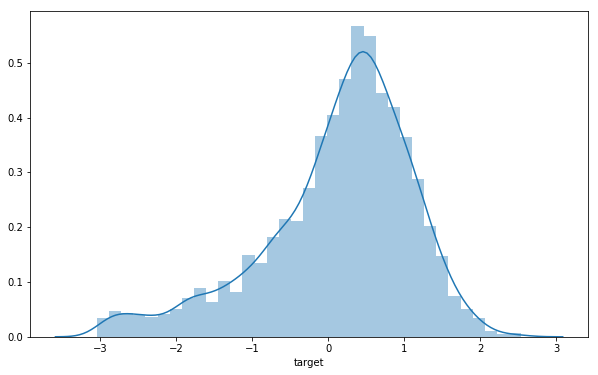

In [7]:
plt.figure(figsize=(10, 6))
sns.distplot(train['target'])
plt

Index(['V0', 'V1', 'V2', 'V3', 'V4', 'V8', 'V12', 'V16', 'V20', 'V27', 'V31',
       'V37', 'target'],
      dtype='object')


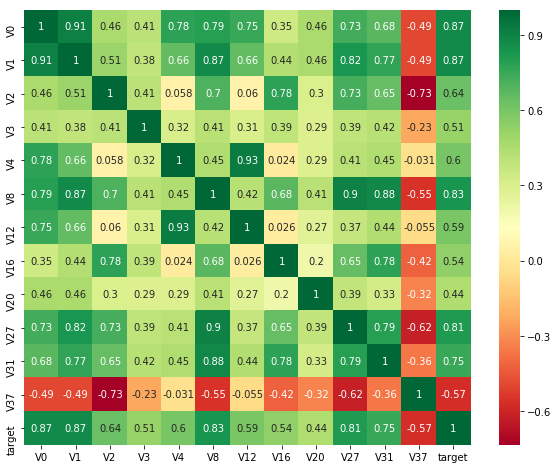

In [9]:
corrmat = train.corr()
top_features = corrmat.index[abs(corrmat["target"]) > 0.4]
print(top_features)
fig, ax = plt.subplots(figsize=(10, 8))
g = sns.heatmap(train[top_features].corr(),annot=True,cmap="RdYlGn")

In [10]:
def plot_scatter(x, y='target'):
    plt.figure(figsize=(10, 8))
    sns.jointplot(x=x, y=y, data=train)
    plt.show()

<Figure size 720x576 with 0 Axes>

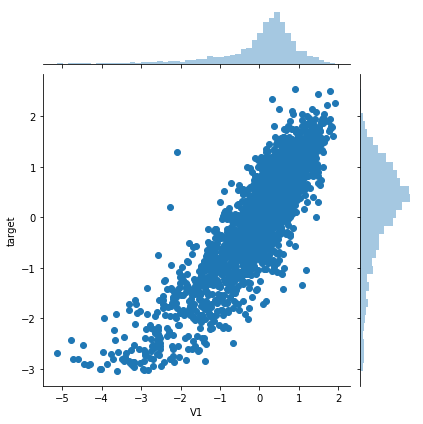

<Figure size 720x576 with 0 Axes>

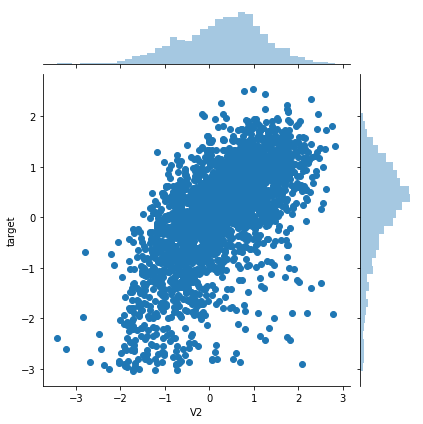

<Figure size 720x576 with 0 Axes>

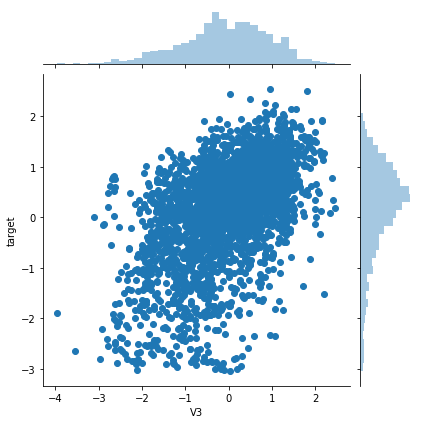

"\nplot_scatter('V4')\n    ......\nplot_scatter('V36')\n"

In [11]:
#通过画图查看特征与目标值的相关性
plot_scatter('V1')
plot_scatter('V2')
plot_scatter('V3')
"""
plot_scatter('V4')
    ......
plot_scatter('V36')
"""

In [12]:
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [13]:
X = train.drop(['target'], axis=1)
print(X.shape)
y = train['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
lgb_train = lgb.Dataset(X_train, y_train)
lgb_valid = lgb.Dataset(X_test, y_test)

(2888, 38)


In [14]:
params = {
    "objective" : 'regression',
    "boosting" : 'gbdt',
    "metric" : 'rmse',
    "learning_rate" : 0.003,
    "max_depth" : 5,
    "num_leaves" : 30,
    "feature_fraction" : 0.8,
    "bagging_fraction" : 0.8,
    "bagging_freq" : 20,
    "lambda_l1" : 0.01,
    "lambda_l2" : 0.01
}
gbm = lgb.train(params, lgb_train, valid_sets=lgb_valid, num_boost_round=10000, early_stopping_rounds=50)
y_pred = gbm.predict(X_test)
print("accuracy = " + str(mean_squared_error(y_pred, y_test)))

[1]	valid_0's rmse: 1.01689
Training until validation scores don't improve for 50 rounds.
[2]	valid_0's rmse: 1.01434
[3]	valid_0's rmse: 1.0118
[4]	valid_0's rmse: 1.00924
[5]	valid_0's rmse: 1.00667
[6]	valid_0's rmse: 1.0041
[7]	valid_0's rmse: 1.0016
[8]	valid_0's rmse: 0.999105
[9]	valid_0's rmse: 0.996602
[10]	valid_0's rmse: 0.994141
[11]	valid_0's rmse: 0.991659
[12]	valid_0's rmse: 0.98933
[13]	valid_0's rmse: 0.986819
[14]	valid_0's rmse: 0.984381
[15]	valid_0's rmse: 0.981923
[16]	valid_0's rmse: 0.979469
[17]	valid_0's rmse: 0.977024
[18]	valid_0's rmse: 0.974596
[19]	valid_0's rmse: 0.972176
[20]	valid_0's rmse: 0.969795
[21]	valid_0's rmse: 0.967394
[22]	valid_0's rmse: 0.965018
[23]	valid_0's rmse: 0.962627
[24]	valid_0's rmse: 0.960218
[25]	valid_0's rmse: 0.957859
[26]	valid_0's rmse: 0.955554
[27]	valid_0's rmse: 0.953192
[28]	valid_0's rmse: 0.95082
[29]	valid_0's rmse: 0.948482
[30]	valid_0's rmse: 0.946134
[31]	valid_0's rmse: 0.943783
[32]	valid_0's rmse: 0.94152


[290]	valid_0's rmse: 0.552289
[291]	valid_0's rmse: 0.551409
[292]	valid_0's rmse: 0.550542
[293]	valid_0's rmse: 0.549662
[294]	valid_0's rmse: 0.548793
[295]	valid_0's rmse: 0.54791
[296]	valid_0's rmse: 0.547059
[297]	valid_0's rmse: 0.546196
[298]	valid_0's rmse: 0.545339
[299]	valid_0's rmse: 0.544555
[300]	valid_0's rmse: 0.543741
[301]	valid_0's rmse: 0.542897
[302]	valid_0's rmse: 0.542033
[303]	valid_0's rmse: 0.541197
[304]	valid_0's rmse: 0.540363
[305]	valid_0's rmse: 0.539508
[306]	valid_0's rmse: 0.538685
[307]	valid_0's rmse: 0.53784
[308]	valid_0's rmse: 0.537007
[309]	valid_0's rmse: 0.536192
[310]	valid_0's rmse: 0.535399
[311]	valid_0's rmse: 0.534596
[312]	valid_0's rmse: 0.533768
[313]	valid_0's rmse: 0.532948
[314]	valid_0's rmse: 0.532127
[315]	valid_0's rmse: 0.531361
[316]	valid_0's rmse: 0.530547
[317]	valid_0's rmse: 0.529732
[318]	valid_0's rmse: 0.528943
[319]	valid_0's rmse: 0.528139
[320]	valid_0's rmse: 0.527358
[321]	valid_0's rmse: 0.526572
[322]	vali

[558]	valid_0's rmse: 0.41114
[559]	valid_0's rmse: 0.410876
[560]	valid_0's rmse: 0.410623
[561]	valid_0's rmse: 0.410349
[562]	valid_0's rmse: 0.410116
[563]	valid_0's rmse: 0.409864
[564]	valid_0's rmse: 0.409599
[565]	valid_0's rmse: 0.409332
[566]	valid_0's rmse: 0.409079
[567]	valid_0's rmse: 0.408804
[568]	valid_0's rmse: 0.408536
[569]	valid_0's rmse: 0.408261
[570]	valid_0's rmse: 0.408018
[571]	valid_0's rmse: 0.407759
[572]	valid_0's rmse: 0.407528
[573]	valid_0's rmse: 0.407272
[574]	valid_0's rmse: 0.407011
[575]	valid_0's rmse: 0.406781
[576]	valid_0's rmse: 0.406511
[577]	valid_0's rmse: 0.406284
[578]	valid_0's rmse: 0.406033
[579]	valid_0's rmse: 0.405784
[580]	valid_0's rmse: 0.405567
[581]	valid_0's rmse: 0.405335
[582]	valid_0's rmse: 0.405104
[583]	valid_0's rmse: 0.404861
[584]	valid_0's rmse: 0.404605
[585]	valid_0's rmse: 0.404376
[586]	valid_0's rmse: 0.404137
[587]	valid_0's rmse: 0.403918
[588]	valid_0's rmse: 0.403697
[589]	valid_0's rmse: 0.403446
[590]	val

[826]	valid_0's rmse: 0.369649
[827]	valid_0's rmse: 0.369542
[828]	valid_0's rmse: 0.36941
[829]	valid_0's rmse: 0.369366
[830]	valid_0's rmse: 0.369289
[831]	valid_0's rmse: 0.369157
[832]	valid_0's rmse: 0.369042
[833]	valid_0's rmse: 0.368941
[834]	valid_0's rmse: 0.368799
[835]	valid_0's rmse: 0.368661
[836]	valid_0's rmse: 0.36855
[837]	valid_0's rmse: 0.368485
[838]	valid_0's rmse: 0.368344
[839]	valid_0's rmse: 0.368224
[840]	valid_0's rmse: 0.368129
[841]	valid_0's rmse: 0.368047
[842]	valid_0's rmse: 0.368011
[843]	valid_0's rmse: 0.367936
[844]	valid_0's rmse: 0.367864
[845]	valid_0's rmse: 0.367785
[846]	valid_0's rmse: 0.367697
[847]	valid_0's rmse: 0.367634
[848]	valid_0's rmse: 0.367574
[849]	valid_0's rmse: 0.367496
[850]	valid_0's rmse: 0.36742
[851]	valid_0's rmse: 0.367341
[852]	valid_0's rmse: 0.367257
[853]	valid_0's rmse: 0.36718
[854]	valid_0's rmse: 0.367115
[855]	valid_0's rmse: 0.367041
[856]	valid_0's rmse: 0.366973
[857]	valid_0's rmse: 0.366899
[858]	valid_

[1101]	valid_0's rmse: 0.355284
[1102]	valid_0's rmse: 0.355261
[1103]	valid_0's rmse: 0.355232
[1104]	valid_0's rmse: 0.355192
[1105]	valid_0's rmse: 0.355171
[1106]	valid_0's rmse: 0.355121
[1107]	valid_0's rmse: 0.355085
[1108]	valid_0's rmse: 0.355053
[1109]	valid_0's rmse: 0.355018
[1110]	valid_0's rmse: 0.35498
[1111]	valid_0's rmse: 0.354943
[1112]	valid_0's rmse: 0.354901
[1113]	valid_0's rmse: 0.354879
[1114]	valid_0's rmse: 0.354829
[1115]	valid_0's rmse: 0.354818
[1116]	valid_0's rmse: 0.354821
[1117]	valid_0's rmse: 0.354786
[1118]	valid_0's rmse: 0.354759
[1119]	valid_0's rmse: 0.354728
[1120]	valid_0's rmse: 0.354699
[1121]	valid_0's rmse: 0.354668
[1122]	valid_0's rmse: 0.35464
[1123]	valid_0's rmse: 0.354624
[1124]	valid_0's rmse: 0.354604
[1125]	valid_0's rmse: 0.354591
[1126]	valid_0's rmse: 0.354559
[1127]	valid_0's rmse: 0.354513
[1128]	valid_0's rmse: 0.354494
[1129]	valid_0's rmse: 0.354471
[1130]	valid_0's rmse: 0.354466
[1131]	valid_0's rmse: 0.354457
[1132]	val

[1390]	valid_0's rmse: 0.349724
[1391]	valid_0's rmse: 0.349722
[1392]	valid_0's rmse: 0.349718
[1393]	valid_0's rmse: 0.349692
[1394]	valid_0's rmse: 0.349679
[1395]	valid_0's rmse: 0.349663
[1396]	valid_0's rmse: 0.349646
[1397]	valid_0's rmse: 0.349633
[1398]	valid_0's rmse: 0.349604
[1399]	valid_0's rmse: 0.349596
[1400]	valid_0's rmse: 0.349601
[1401]	valid_0's rmse: 0.349584
[1402]	valid_0's rmse: 0.349574
[1403]	valid_0's rmse: 0.349557
[1404]	valid_0's rmse: 0.349527
[1405]	valid_0's rmse: 0.349498
[1406]	valid_0's rmse: 0.349473
[1407]	valid_0's rmse: 0.349455
[1408]	valid_0's rmse: 0.349429
[1409]	valid_0's rmse: 0.349396
[1410]	valid_0's rmse: 0.349373
[1411]	valid_0's rmse: 0.349346
[1412]	valid_0's rmse: 0.349312
[1413]	valid_0's rmse: 0.349278
[1414]	valid_0's rmse: 0.349255
[1415]	valid_0's rmse: 0.34924
[1416]	valid_0's rmse: 0.349216
[1417]	valid_0's rmse: 0.349221
[1418]	valid_0's rmse: 0.34921
[1419]	valid_0's rmse: 0.349204
[1420]	valid_0's rmse: 0.349172
[1421]	val

[1713]	valid_0's rmse: 0.346922
[1714]	valid_0's rmse: 0.346901
[1715]	valid_0's rmse: 0.346883
[1716]	valid_0's rmse: 0.346865
[1717]	valid_0's rmse: 0.346847
[1718]	valid_0's rmse: 0.346822
[1719]	valid_0's rmse: 0.346803
[1720]	valid_0's rmse: 0.346793
[1721]	valid_0's rmse: 0.34679
[1722]	valid_0's rmse: 0.346793
[1723]	valid_0's rmse: 0.346778
[1724]	valid_0's rmse: 0.346771
[1725]	valid_0's rmse: 0.346755
[1726]	valid_0's rmse: 0.346745
[1727]	valid_0's rmse: 0.346749
[1728]	valid_0's rmse: 0.34673
[1729]	valid_0's rmse: 0.34673
[1730]	valid_0's rmse: 0.346717
[1731]	valid_0's rmse: 0.346702
[1732]	valid_0's rmse: 0.346694
[1733]	valid_0's rmse: 0.346689
[1734]	valid_0's rmse: 0.346677
[1735]	valid_0's rmse: 0.346667
[1736]	valid_0's rmse: 0.346658
[1737]	valid_0's rmse: 0.346646
[1738]	valid_0's rmse: 0.346642
[1739]	valid_0's rmse: 0.346635
[1740]	valid_0's rmse: 0.346627
[1741]	valid_0's rmse: 0.346616
[1742]	valid_0's rmse: 0.346613
[1743]	valid_0's rmse: 0.346593
[1744]	vali

[1981]	valid_0's rmse: 0.345201
[1982]	valid_0's rmse: 0.345202
[1983]	valid_0's rmse: 0.345201
[1984]	valid_0's rmse: 0.345203
[1985]	valid_0's rmse: 0.345205
[1986]	valid_0's rmse: 0.345199
[1987]	valid_0's rmse: 0.345204
[1988]	valid_0's rmse: 0.345197
[1989]	valid_0's rmse: 0.345195
[1990]	valid_0's rmse: 0.345204
[1991]	valid_0's rmse: 0.345214
[1992]	valid_0's rmse: 0.345204
[1993]	valid_0's rmse: 0.345198
[1994]	valid_0's rmse: 0.345193
[1995]	valid_0's rmse: 0.345188
[1996]	valid_0's rmse: 0.345188
[1997]	valid_0's rmse: 0.345189
[1998]	valid_0's rmse: 0.345205
[1999]	valid_0's rmse: 0.345194
[2000]	valid_0's rmse: 0.345183
[2001]	valid_0's rmse: 0.345183
[2002]	valid_0's rmse: 0.345166
[2003]	valid_0's rmse: 0.345166
[2004]	valid_0's rmse: 0.345148
[2005]	valid_0's rmse: 0.345147
[2006]	valid_0's rmse: 0.345129
[2007]	valid_0's rmse: 0.345126
[2008]	valid_0's rmse: 0.345125
[2009]	valid_0's rmse: 0.345123
[2010]	valid_0's rmse: 0.345129
[2011]	valid_0's rmse: 0.345119
[2012]	v

[2270]	valid_0's rmse: 0.34409
[2271]	valid_0's rmse: 0.3441
[2272]	valid_0's rmse: 0.344116
[2273]	valid_0's rmse: 0.344106
[2274]	valid_0's rmse: 0.34411
[2275]	valid_0's rmse: 0.344119
[2276]	valid_0's rmse: 0.344135
[2277]	valid_0's rmse: 0.344145
[2278]	valid_0's rmse: 0.344149
[2279]	valid_0's rmse: 0.344147
[2280]	valid_0's rmse: 0.344153
[2281]	valid_0's rmse: 0.344154
[2282]	valid_0's rmse: 0.344177
[2283]	valid_0's rmse: 0.344197
[2284]	valid_0's rmse: 0.34421
[2285]	valid_0's rmse: 0.344212
[2286]	valid_0's rmse: 0.344228
[2287]	valid_0's rmse: 0.344225
[2288]	valid_0's rmse: 0.34425
[2289]	valid_0's rmse: 0.344274
[2290]	valid_0's rmse: 0.344294
[2291]	valid_0's rmse: 0.344314
[2292]	valid_0's rmse: 0.344322
[2293]	valid_0's rmse: 0.344341
[2294]	valid_0's rmse: 0.344364
[2295]	valid_0's rmse: 0.344386
[2296]	valid_0's rmse: 0.344395
[2297]	valid_0's rmse: 0.344402
[2298]	valid_0's rmse: 0.344397
[2299]	valid_0's rmse: 0.34441
[2300]	valid_0's rmse: 0.344425
[2301]	valid_0'

In [15]:
cv_results = lgb.cv(params, lgb_train, num_boost_round=5000, nfold=5, stratified=False, shuffle=True,
                    metrics="rmse", early_stopping_rounds=20, verbose_eval=None)
print("num_iteration = " + str(len(cv_results['rmse-mean'])))
print("cv_results = " + str(cv_results['rmse-mean'][-1]))

num_iteration = 3180
cv_results = 0.3286388687010614


In [17]:
gbm = lgb.LGBMRegressor(objective='regression', metric="rmse", n_estimators=3180, 
             max_depth = 5, num_leaves = 30, feature_fraction = 0.8,
             bagging_feature=0.8, bagging_freq=20, learning_rate=0.003)
params = {
    "max_depth" : np.arange(5, 10),
    "num_leaves" : np.arange(30, 40, 5)
}
grid_search1 = GridSearchCV(gbm, params, scoring='neg_mean_squared_error', n_jobs=-1, cv=3)
grid_search1.fit(X_train, y_train)
print("best scores = " + str(grid_search1.best_score_))
print("best parmas = " + str(grid_search1.best_params_))

best scores = -0.1135937415357944
best parmas = {'max_depth': 9, 'num_leaves': 35}


In [18]:
gbm = lgb.LGBMRegressor(objective='regression', metric="rmse", n_estimators=3180, 
             max_depth = 9, num_leaves = 35, feature_fraction = 0.8,
             bagging_fraction=0.8, bagging_freq=20, learning_rate=0.003)
params = {
    "max_bin" : np.arange(10, 200, 20),
    "min_data_in_leaf" : np.arange(5, 106, 10)
}
grid_search1 = GridSearchCV(gbm, params, scoring='neg_mean_squared_error', n_jobs=-1, cv=3)
grid_search1.fit(X_train, y_train)
print("best scores = " + str(grid_search1.best_score_))
print("best parmas = " + str(grid_search1.best_params_))

best scores = -0.10860174747227122
best parmas = {'max_bin': 50, 'min_data_in_leaf': 25}


In [23]:
gbm = lgb.LGBMRegressor(objective='regression', metric="rmse", n_estimators=3180, 
             max_depth = 9, num_leaves = 35, max_bin=50, min_data_in_leaf=25,
             feature_fraction = 0.8,bagging_feature=0.8, bagging_freq=20, learning_rate=0.003)
params = {
            'feature_fraction': [0.6,0.7,0.8,0.9,1.0],
            'bagging_fraction': [0.6,0.7,0.8,0.9,1.0],
            'bagging_freq': range(0,81,10)
        }
grid_search1 = GridSearchCV(gbm, params, scoring='neg_mean_squared_error', n_jobs=-1, cv=3)
grid_search1.fit(X_train, y_train)
print("best scores = " + str(grid_search1.best_score_))
print("best parmas = " + str(grid_search1.best_params_))

best scores = -0.10828940552408428
best parmas = {'bagging_fraction': 0.7, 'bagging_freq': 10, 'feature_fraction': 0.7}


In [24]:
gbm = lgb.LGBMRegressor(objective='regression', metric="rmse", n_estimators=3180, 
             max_depth = 9, num_leaves = 35, max_bin=50, min_data_in_leaf=25,
             feature_fraction = 0.7,bagging_fraction=0.7, bagging_freq=10, learning_rate=0.003)
params = {
    "lambda_l1": [1e-5,1e-3,1e-1,0.0,0.1,0.3],
    "lambda_l2": [1e-5,1e-3,1e-1,0.0,0.1,0.3]
}
grid_search1 = GridSearchCV(gbm, params, scoring='neg_mean_squared_error', n_jobs=-1, cv=3)
grid_search1.fit(X_train, y_train)
print("best scores = " + str(grid_search1.best_score_))
print("best parmas = " + str(grid_search1.best_params_))

best scores = -0.10822411408118608
best parmas = {'lambda_l1': 0.001, 'lambda_l2': 0.001}


In [26]:
params = {
    "objective" : 'regression',
    "boosting" : 'gbdt',
    "metric" : 'rmse',
    "max_depth" : 9,
    "num_leaves" : 35,
    "max_bin" : 50,
    "min_data_in_leaf" :25,
    "feature_fraction" : 0.7,
    "bagging_fraction" : 0.7,
    "bagging_freq" : 10,
    "learning_rate" : 0.003,
    "lambda_l1" : 0.001,
    "lambda_l2" : 0.001,
}
gbm = lgb.train(params, lgb_train, valid_sets=lgb_valid, num_boost_round=10000, early_stopping_rounds=50)
y_pred = gbm.predict(X_test)
print("accuracy = " + str(mean_squared_error(y_pred, y_test)))

[1]	valid_0's rmse: 1.0169
Training until validation scores don't improve for 50 rounds.
[2]	valid_0's rmse: 1.01432
[3]	valid_0's rmse: 1.01174
[4]	valid_0's rmse: 1.00926
[5]	valid_0's rmse: 1.00679
[6]	valid_0's rmse: 1.00422
[7]	valid_0's rmse: 1.00171
[8]	valid_0's rmse: 0.999395
[9]	valid_0's rmse: 0.996877
[10]	valid_0's rmse: 0.994371
[11]	valid_0's rmse: 0.991899
[12]	valid_0's rmse: 0.989503
[13]	valid_0's rmse: 0.987056
[14]	valid_0's rmse: 0.984583
[15]	valid_0's rmse: 0.982144
[16]	valid_0's rmse: 0.979904
[17]	valid_0's rmse: 0.977492
[18]	valid_0's rmse: 0.975046
[19]	valid_0's rmse: 0.972611
[20]	valid_0's rmse: 0.970189
[21]	valid_0's rmse: 0.967748
[22]	valid_0's rmse: 0.965424
[23]	valid_0's rmse: 0.962997
[24]	valid_0's rmse: 0.960608
[25]	valid_0's rmse: 0.958212
[26]	valid_0's rmse: 0.955944
[27]	valid_0's rmse: 0.95354
[28]	valid_0's rmse: 0.951162
[29]	valid_0's rmse: 0.948798
[30]	valid_0's rmse: 0.946461
[31]	valid_0's rmse: 0.944102
[32]	valid_0's rmse: 0.941

[275]	valid_0's rmse: 0.565023
[276]	valid_0's rmse: 0.564054
[277]	valid_0's rmse: 0.563072
[278]	valid_0's rmse: 0.562114
[279]	valid_0's rmse: 0.561185
[280]	valid_0's rmse: 0.560229
[281]	valid_0's rmse: 0.55933
[282]	valid_0's rmse: 0.558416
[283]	valid_0's rmse: 0.55748
[284]	valid_0's rmse: 0.556536
[285]	valid_0's rmse: 0.555637
[286]	valid_0's rmse: 0.554758
[287]	valid_0's rmse: 0.553826
[288]	valid_0's rmse: 0.552985
[289]	valid_0's rmse: 0.552075
[290]	valid_0's rmse: 0.551151
[291]	valid_0's rmse: 0.550219
[292]	valid_0's rmse: 0.549318
[293]	valid_0's rmse: 0.548449
[294]	valid_0's rmse: 0.547559
[295]	valid_0's rmse: 0.546675
[296]	valid_0's rmse: 0.5458
[297]	valid_0's rmse: 0.544933
[298]	valid_0's rmse: 0.544059
[299]	valid_0's rmse: 0.543184
[300]	valid_0's rmse: 0.542334
[301]	valid_0's rmse: 0.541491
[302]	valid_0's rmse: 0.540608
[303]	valid_0's rmse: 0.539744
[304]	valid_0's rmse: 0.538855
[305]	valid_0's rmse: 0.537948
[306]	valid_0's rmse: 0.537076
[307]	valid_

[577]	valid_0's rmse: 0.402601
[578]	valid_0's rmse: 0.402351
[579]	valid_0's rmse: 0.402085
[580]	valid_0's rmse: 0.401824
[581]	valid_0's rmse: 0.401596
[582]	valid_0's rmse: 0.401344
[583]	valid_0's rmse: 0.401087
[584]	valid_0's rmse: 0.400836
[585]	valid_0's rmse: 0.400583
[586]	valid_0's rmse: 0.400313
[587]	valid_0's rmse: 0.400074
[588]	valid_0's rmse: 0.399803
[589]	valid_0's rmse: 0.399544
[590]	valid_0's rmse: 0.399291
[591]	valid_0's rmse: 0.399055
[592]	valid_0's rmse: 0.398804
[593]	valid_0's rmse: 0.398571
[594]	valid_0's rmse: 0.398385
[595]	valid_0's rmse: 0.398176
[596]	valid_0's rmse: 0.397972
[597]	valid_0's rmse: 0.397775
[598]	valid_0's rmse: 0.397547
[599]	valid_0's rmse: 0.39734
[600]	valid_0's rmse: 0.397091
[601]	valid_0's rmse: 0.396837
[602]	valid_0's rmse: 0.396604
[603]	valid_0's rmse: 0.39636
[604]	valid_0's rmse: 0.396095
[605]	valid_0's rmse: 0.395866
[606]	valid_0's rmse: 0.395637
[607]	valid_0's rmse: 0.395399
[608]	valid_0's rmse: 0.395183
[609]	vali

[860]	valid_0's rmse: 0.361549
[861]	valid_0's rmse: 0.361484
[862]	valid_0's rmse: 0.361406
[863]	valid_0's rmse: 0.36135
[864]	valid_0's rmse: 0.361294
[865]	valid_0's rmse: 0.361233
[866]	valid_0's rmse: 0.361154
[867]	valid_0's rmse: 0.361094
[868]	valid_0's rmse: 0.361018
[869]	valid_0's rmse: 0.36096
[870]	valid_0's rmse: 0.3609
[871]	valid_0's rmse: 0.360856
[872]	valid_0's rmse: 0.360799
[873]	valid_0's rmse: 0.360737
[874]	valid_0's rmse: 0.360653
[875]	valid_0's rmse: 0.360589
[876]	valid_0's rmse: 0.360527
[877]	valid_0's rmse: 0.36048
[878]	valid_0's rmse: 0.360411
[879]	valid_0's rmse: 0.360329
[880]	valid_0's rmse: 0.360271
[881]	valid_0's rmse: 0.360209
[882]	valid_0's rmse: 0.360167
[883]	valid_0's rmse: 0.360133
[884]	valid_0's rmse: 0.360094
[885]	valid_0's rmse: 0.36002
[886]	valid_0's rmse: 0.359976
[887]	valid_0's rmse: 0.359914
[888]	valid_0's rmse: 0.359876
[889]	valid_0's rmse: 0.359821
[890]	valid_0's rmse: 0.359769
[891]	valid_0's rmse: 0.359711
[892]	valid_0'

[1142]	valid_0's rmse: 0.34934
[1143]	valid_0's rmse: 0.349302
[1144]	valid_0's rmse: 0.349251
[1145]	valid_0's rmse: 0.349208
[1146]	valid_0's rmse: 0.349183
[1147]	valid_0's rmse: 0.349129
[1148]	valid_0's rmse: 0.349079
[1149]	valid_0's rmse: 0.349045
[1150]	valid_0's rmse: 0.349017
[1151]	valid_0's rmse: 0.348981
[1152]	valid_0's rmse: 0.348963
[1153]	valid_0's rmse: 0.348957
[1154]	valid_0's rmse: 0.348944
[1155]	valid_0's rmse: 0.348924
[1156]	valid_0's rmse: 0.348889
[1157]	valid_0's rmse: 0.348865
[1158]	valid_0's rmse: 0.348849
[1159]	valid_0's rmse: 0.348823
[1160]	valid_0's rmse: 0.348802
[1161]	valid_0's rmse: 0.348775
[1162]	valid_0's rmse: 0.348744
[1163]	valid_0's rmse: 0.348717
[1164]	valid_0's rmse: 0.348703
[1165]	valid_0's rmse: 0.348668
[1166]	valid_0's rmse: 0.348644
[1167]	valid_0's rmse: 0.348627
[1168]	valid_0's rmse: 0.3486
[1169]	valid_0's rmse: 0.348571
[1170]	valid_0's rmse: 0.348562
[1171]	valid_0's rmse: 0.348546
[1172]	valid_0's rmse: 0.34851
[1173]	valid

[1411]	valid_0's rmse: 0.344381
[1412]	valid_0's rmse: 0.34435
[1413]	valid_0's rmse: 0.344342
[1414]	valid_0's rmse: 0.344347
[1415]	valid_0's rmse: 0.344327
[1416]	valid_0's rmse: 0.344309
[1417]	valid_0's rmse: 0.34432
[1418]	valid_0's rmse: 0.344332
[1419]	valid_0's rmse: 0.344347
[1420]	valid_0's rmse: 0.344332
[1421]	valid_0's rmse: 0.344331
[1422]	valid_0's rmse: 0.344328
[1423]	valid_0's rmse: 0.344313
[1424]	valid_0's rmse: 0.344299
[1425]	valid_0's rmse: 0.34428
[1426]	valid_0's rmse: 0.344277
[1427]	valid_0's rmse: 0.344269
[1428]	valid_0's rmse: 0.344263
[1429]	valid_0's rmse: 0.344258
[1430]	valid_0's rmse: 0.344231
[1431]	valid_0's rmse: 0.344235
[1432]	valid_0's rmse: 0.344207
[1433]	valid_0's rmse: 0.344193
[1434]	valid_0's rmse: 0.344184
[1435]	valid_0's rmse: 0.344165
[1436]	valid_0's rmse: 0.344152
[1437]	valid_0's rmse: 0.34412
[1438]	valid_0's rmse: 0.344126
[1439]	valid_0's rmse: 0.344099
[1440]	valid_0's rmse: 0.344085
[1441]	valid_0's rmse: 0.344065
[1442]	valid

[1699]	valid_0's rmse: 0.341232
[1700]	valid_0's rmse: 0.341216
[1701]	valid_0's rmse: 0.34122
[1702]	valid_0's rmse: 0.34119
[1703]	valid_0's rmse: 0.341187
[1704]	valid_0's rmse: 0.341177
[1705]	valid_0's rmse: 0.341159
[1706]	valid_0's rmse: 0.341159
[1707]	valid_0's rmse: 0.341161
[1708]	valid_0's rmse: 0.34113
[1709]	valid_0's rmse: 0.341137
[1710]	valid_0's rmse: 0.341126
[1711]	valid_0's rmse: 0.341129
[1712]	valid_0's rmse: 0.341117
[1713]	valid_0's rmse: 0.341111
[1714]	valid_0's rmse: 0.341099
[1715]	valid_0's rmse: 0.341082
[1716]	valid_0's rmse: 0.341075
[1717]	valid_0's rmse: 0.341054
[1718]	valid_0's rmse: 0.341044
[1719]	valid_0's rmse: 0.341033
[1720]	valid_0's rmse: 0.341016
[1721]	valid_0's rmse: 0.341001
[1722]	valid_0's rmse: 0.340997
[1723]	valid_0's rmse: 0.340968
[1724]	valid_0's rmse: 0.340955
[1725]	valid_0's rmse: 0.340944
[1726]	valid_0's rmse: 0.340936
[1727]	valid_0's rmse: 0.340929
[1728]	valid_0's rmse: 0.340932
[1729]	valid_0's rmse: 0.340915
[1730]	vali

[1967]	valid_0's rmse: 0.339499
[1968]	valid_0's rmse: 0.339498
[1969]	valid_0's rmse: 0.339497
[1970]	valid_0's rmse: 0.339471
[1971]	valid_0's rmse: 0.339471
[1972]	valid_0's rmse: 0.339462
[1973]	valid_0's rmse: 0.339449
[1974]	valid_0's rmse: 0.33944
[1975]	valid_0's rmse: 0.339456
[1976]	valid_0's rmse: 0.339448
[1977]	valid_0's rmse: 0.339441
[1978]	valid_0's rmse: 0.339452
[1979]	valid_0's rmse: 0.339442
[1980]	valid_0's rmse: 0.339445
[1981]	valid_0's rmse: 0.339423
[1982]	valid_0's rmse: 0.339408
[1983]	valid_0's rmse: 0.339397
[1984]	valid_0's rmse: 0.339391
[1985]	valid_0's rmse: 0.339387
[1986]	valid_0's rmse: 0.339385
[1987]	valid_0's rmse: 0.33938
[1988]	valid_0's rmse: 0.339389
[1989]	valid_0's rmse: 0.339403
[1990]	valid_0's rmse: 0.339381
[1991]	valid_0's rmse: 0.339371
[1992]	valid_0's rmse: 0.339355
[1993]	valid_0's rmse: 0.339344
[1994]	valid_0's rmse: 0.339324
[1995]	valid_0's rmse: 0.339301
[1996]	valid_0's rmse: 0.339284
[1997]	valid_0's rmse: 0.339282
[1998]	val

[2246]	valid_0's rmse: 0.337971
[2247]	valid_0's rmse: 0.337952
[2248]	valid_0's rmse: 0.337942
[2249]	valid_0's rmse: 0.337943
[2250]	valid_0's rmse: 0.337931
[2251]	valid_0's rmse: 0.337922
[2252]	valid_0's rmse: 0.33791
[2253]	valid_0's rmse: 0.337903
[2254]	valid_0's rmse: 0.337885
[2255]	valid_0's rmse: 0.337876
[2256]	valid_0's rmse: 0.337853
[2257]	valid_0's rmse: 0.337838
[2258]	valid_0's rmse: 0.337837
[2259]	valid_0's rmse: 0.337835
[2260]	valid_0's rmse: 0.337823
[2261]	valid_0's rmse: 0.33781
[2262]	valid_0's rmse: 0.337812
[2263]	valid_0's rmse: 0.337811
[2264]	valid_0's rmse: 0.337805
[2265]	valid_0's rmse: 0.337799
[2266]	valid_0's rmse: 0.337794
[2267]	valid_0's rmse: 0.337777
[2268]	valid_0's rmse: 0.337752
[2269]	valid_0's rmse: 0.337747
[2270]	valid_0's rmse: 0.337763
[2271]	valid_0's rmse: 0.337758
[2272]	valid_0's rmse: 0.337751
[2273]	valid_0's rmse: 0.337748
[2274]	valid_0's rmse: 0.337753
[2275]	valid_0's rmse: 0.337756
[2276]	valid_0's rmse: 0.337757
[2277]	val

[2513]	valid_0's rmse: 0.336762
[2514]	valid_0's rmse: 0.336758
[2515]	valid_0's rmse: 0.336751
[2516]	valid_0's rmse: 0.336738
[2517]	valid_0's rmse: 0.336728
[2518]	valid_0's rmse: 0.336727
[2519]	valid_0's rmse: 0.336729
[2520]	valid_0's rmse: 0.336726
[2521]	valid_0's rmse: 0.336716
[2522]	valid_0's rmse: 0.336702
[2523]	valid_0's rmse: 0.336697
[2524]	valid_0's rmse: 0.336696
[2525]	valid_0's rmse: 0.336679
[2526]	valid_0's rmse: 0.336676
[2527]	valid_0's rmse: 0.336666
[2528]	valid_0's rmse: 0.336665
[2529]	valid_0's rmse: 0.336661
[2530]	valid_0's rmse: 0.336635
[2531]	valid_0's rmse: 0.336643
[2532]	valid_0's rmse: 0.336645
[2533]	valid_0's rmse: 0.336649
[2534]	valid_0's rmse: 0.336643
[2535]	valid_0's rmse: 0.336646
[2536]	valid_0's rmse: 0.336655
[2537]	valid_0's rmse: 0.336651
[2538]	valid_0's rmse: 0.336646
[2539]	valid_0's rmse: 0.336638
[2540]	valid_0's rmse: 0.336636
[2541]	valid_0's rmse: 0.336622
[2542]	valid_0's rmse: 0.336618
[2543]	valid_0's rmse: 0.336609
[2544]	v

[2802]	valid_0's rmse: 0.335363
[2803]	valid_0's rmse: 0.335348
[2804]	valid_0's rmse: 0.335352
[2805]	valid_0's rmse: 0.335339
[2806]	valid_0's rmse: 0.335326
[2807]	valid_0's rmse: 0.335299
[2808]	valid_0's rmse: 0.335295
[2809]	valid_0's rmse: 0.335297
[2810]	valid_0's rmse: 0.335301
[2811]	valid_0's rmse: 0.335293
[2812]	valid_0's rmse: 0.335297
[2813]	valid_0's rmse: 0.335301
[2814]	valid_0's rmse: 0.335296
[2815]	valid_0's rmse: 0.335297
[2816]	valid_0's rmse: 0.335295
[2817]	valid_0's rmse: 0.335296
[2818]	valid_0's rmse: 0.335295
[2819]	valid_0's rmse: 0.335297
[2820]	valid_0's rmse: 0.335304
[2821]	valid_0's rmse: 0.335307
[2822]	valid_0's rmse: 0.335311
[2823]	valid_0's rmse: 0.335308
[2824]	valid_0's rmse: 0.335299
[2825]	valid_0's rmse: 0.335275
[2826]	valid_0's rmse: 0.33526
[2827]	valid_0's rmse: 0.335263
[2828]	valid_0's rmse: 0.335242
[2829]	valid_0's rmse: 0.335227
[2830]	valid_0's rmse: 0.335204
[2831]	valid_0's rmse: 0.33519
[2832]	valid_0's rmse: 0.335175
[2833]	val

[3071]	valid_0's rmse: 0.334075
[3072]	valid_0's rmse: 0.334072
[3073]	valid_0's rmse: 0.334079
[3074]	valid_0's rmse: 0.334061
[3075]	valid_0's rmse: 0.334056
[3076]	valid_0's rmse: 0.334051
[3077]	valid_0's rmse: 0.334044
[3078]	valid_0's rmse: 0.33404
[3079]	valid_0's rmse: 0.334044
[3080]	valid_0's rmse: 0.334046
[3081]	valid_0's rmse: 0.334038
[3082]	valid_0's rmse: 0.334036
[3083]	valid_0's rmse: 0.334036
[3084]	valid_0's rmse: 0.334042
[3085]	valid_0's rmse: 0.334029
[3086]	valid_0's rmse: 0.33403
[3087]	valid_0's rmse: 0.334019
[3088]	valid_0's rmse: 0.334024
[3089]	valid_0's rmse: 0.334019
[3090]	valid_0's rmse: 0.334012
[3091]	valid_0's rmse: 0.334018
[3092]	valid_0's rmse: 0.33402
[3093]	valid_0's rmse: 0.334017
[3094]	valid_0's rmse: 0.33402
[3095]	valid_0's rmse: 0.334012
[3096]	valid_0's rmse: 0.334014
[3097]	valid_0's rmse: 0.334018
[3098]	valid_0's rmse: 0.334021
[3099]	valid_0's rmse: 0.334015
[3100]	valid_0's rmse: 0.33401
[3101]	valid_0's rmse: 0.333995
[3102]	valid_

[3373]	valid_0's rmse: 0.333081
[3374]	valid_0's rmse: 0.33308
[3375]	valid_0's rmse: 0.333085
[3376]	valid_0's rmse: 0.333083
[3377]	valid_0's rmse: 0.333086
[3378]	valid_0's rmse: 0.333088
[3379]	valid_0's rmse: 0.333087
[3380]	valid_0's rmse: 0.333081
[3381]	valid_0's rmse: 0.333085
[3382]	valid_0's rmse: 0.333089
[3383]	valid_0's rmse: 0.333079
[3384]	valid_0's rmse: 0.333085
[3385]	valid_0's rmse: 0.333086
[3386]	valid_0's rmse: 0.333085
[3387]	valid_0's rmse: 0.333092
[3388]	valid_0's rmse: 0.333101
[3389]	valid_0's rmse: 0.333106
[3390]	valid_0's rmse: 0.333114
[3391]	valid_0's rmse: 0.33311
[3392]	valid_0's rmse: 0.333103
[3393]	valid_0's rmse: 0.333098
[3394]	valid_0's rmse: 0.333092
[3395]	valid_0's rmse: 0.333093
[3396]	valid_0's rmse: 0.333094
[3397]	valid_0's rmse: 0.333075
[3398]	valid_0's rmse: 0.333067
[3399]	valid_0's rmse: 0.333059
[3400]	valid_0's rmse: 0.333049
[3401]	valid_0's rmse: 0.333044
[3402]	valid_0's rmse: 0.333023
[3403]	valid_0's rmse: 0.333007
[3404]	val

[3660]	valid_0's rmse: 0.332563
[3661]	valid_0's rmse: 0.332571
[3662]	valid_0's rmse: 0.332579
[3663]	valid_0's rmse: 0.332587
[3664]	valid_0's rmse: 0.332574
[3665]	valid_0's rmse: 0.332576
[3666]	valid_0's rmse: 0.332585
[3667]	valid_0's rmse: 0.33259
[3668]	valid_0's rmse: 0.332591
[3669]	valid_0's rmse: 0.332598
[3670]	valid_0's rmse: 0.332595
[3671]	valid_0's rmse: 0.332606
[3672]	valid_0's rmse: 0.332604
[3673]	valid_0's rmse: 0.332585
[3674]	valid_0's rmse: 0.332584
[3675]	valid_0's rmse: 0.332593
[3676]	valid_0's rmse: 0.3326
[3677]	valid_0's rmse: 0.332603
[3678]	valid_0's rmse: 0.332606
[3679]	valid_0's rmse: 0.332611
[3680]	valid_0's rmse: 0.332615
[3681]	valid_0's rmse: 0.332611
[3682]	valid_0's rmse: 0.332611
[3683]	valid_0's rmse: 0.332603
[3684]	valid_0's rmse: 0.332605
[3685]	valid_0's rmse: 0.332608
[3686]	valid_0's rmse: 0.332616
[3687]	valid_0's rmse: 0.332617
[3688]	valid_0's rmse: 0.332618
[3689]	valid_0's rmse: 0.332618
[3690]	valid_0's rmse: 0.332629
[3691]	vali

[3955]	valid_0's rmse: 0.331924
[3956]	valid_0's rmse: 0.331927
[3957]	valid_0's rmse: 0.33193
[3958]	valid_0's rmse: 0.331925
[3959]	valid_0's rmse: 0.331919
[3960]	valid_0's rmse: 0.331907
[3961]	valid_0's rmse: 0.331906
[3962]	valid_0's rmse: 0.331897
[3963]	valid_0's rmse: 0.331905
[3964]	valid_0's rmse: 0.331899
[3965]	valid_0's rmse: 0.331901
[3966]	valid_0's rmse: 0.331898
[3967]	valid_0's rmse: 0.331891
[3968]	valid_0's rmse: 0.331889
[3969]	valid_0's rmse: 0.33189
[3970]	valid_0's rmse: 0.331889
[3971]	valid_0's rmse: 0.331885
[3972]	valid_0's rmse: 0.331893
[3973]	valid_0's rmse: 0.331888
[3974]	valid_0's rmse: 0.331886
[3975]	valid_0's rmse: 0.331878
[3976]	valid_0's rmse: 0.331864
[3977]	valid_0's rmse: 0.331865
[3978]	valid_0's rmse: 0.331864
[3979]	valid_0's rmse: 0.331866
[3980]	valid_0's rmse: 0.331867
[3981]	valid_0's rmse: 0.331859
[3982]	valid_0's rmse: 0.33185
[3983]	valid_0's rmse: 0.331849
[3984]	valid_0's rmse: 0.33185
[3985]	valid_0's rmse: 0.331846
[3986]	valid

[4230]	valid_0's rmse: 0.331158
[4231]	valid_0's rmse: 0.331159
[4232]	valid_0's rmse: 0.331159
[4233]	valid_0's rmse: 0.331162
[4234]	valid_0's rmse: 0.331157
[4235]	valid_0's rmse: 0.331153
[4236]	valid_0's rmse: 0.331157
[4237]	valid_0's rmse: 0.331165
[4238]	valid_0's rmse: 0.331159
[4239]	valid_0's rmse: 0.331149
[4240]	valid_0's rmse: 0.331148
[4241]	valid_0's rmse: 0.33116
[4242]	valid_0's rmse: 0.331153
[4243]	valid_0's rmse: 0.33115
[4244]	valid_0's rmse: 0.331156
[4245]	valid_0's rmse: 0.331153
[4246]	valid_0's rmse: 0.331159
[4247]	valid_0's rmse: 0.331149
[4248]	valid_0's rmse: 0.331145
[4249]	valid_0's rmse: 0.331141
[4250]	valid_0's rmse: 0.331142
[4251]	valid_0's rmse: 0.33114
[4252]	valid_0's rmse: 0.331139
[4253]	valid_0's rmse: 0.331143
[4254]	valid_0's rmse: 0.331141
[4255]	valid_0's rmse: 0.331145
[4256]	valid_0's rmse: 0.331139
[4257]	valid_0's rmse: 0.331137
[4258]	valid_0's rmse: 0.331139
[4259]	valid_0's rmse: 0.331137
[4260]	valid_0's rmse: 0.331125
[4261]	vali

[4492]	valid_0's rmse: 0.330733
[4493]	valid_0's rmse: 0.330731
[4494]	valid_0's rmse: 0.33073
[4495]	valid_0's rmse: 0.330722
[4496]	valid_0's rmse: 0.330714
[4497]	valid_0's rmse: 0.330706
[4498]	valid_0's rmse: 0.330705
[4499]	valid_0's rmse: 0.330701
[4500]	valid_0's rmse: 0.330687
[4501]	valid_0's rmse: 0.330686
[4502]	valid_0's rmse: 0.330676
[4503]	valid_0's rmse: 0.330679
[4504]	valid_0's rmse: 0.330672
[4505]	valid_0's rmse: 0.330667
[4506]	valid_0's rmse: 0.330669
[4507]	valid_0's rmse: 0.330666
[4508]	valid_0's rmse: 0.330666
[4509]	valid_0's rmse: 0.33066
[4510]	valid_0's rmse: 0.330647
[4511]	valid_0's rmse: 0.330649
[4512]	valid_0's rmse: 0.330647
[4513]	valid_0's rmse: 0.330652
[4514]	valid_0's rmse: 0.330654
[4515]	valid_0's rmse: 0.330644
[4516]	valid_0's rmse: 0.330641
[4517]	valid_0's rmse: 0.330645
[4518]	valid_0's rmse: 0.330639
[4519]	valid_0's rmse: 0.330632
[4520]	valid_0's rmse: 0.330634
[4521]	valid_0's rmse: 0.330631
[4522]	valid_0's rmse: 0.330628
[4523]	val

[4770]	valid_0's rmse: 0.330124
[4771]	valid_0's rmse: 0.33013
[4772]	valid_0's rmse: 0.330133
[4773]	valid_0's rmse: 0.330131
[4774]	valid_0's rmse: 0.330131
[4775]	valid_0's rmse: 0.330125
[4776]	valid_0's rmse: 0.330131
[4777]	valid_0's rmse: 0.330129
[4778]	valid_0's rmse: 0.330133
[4779]	valid_0's rmse: 0.330129
[4780]	valid_0's rmse: 0.330126
[4781]	valid_0's rmse: 0.330119
[4782]	valid_0's rmse: 0.33012
[4783]	valid_0's rmse: 0.330119
[4784]	valid_0's rmse: 0.330116
[4785]	valid_0's rmse: 0.330112
[4786]	valid_0's rmse: 0.330113
[4787]	valid_0's rmse: 0.330105
[4788]	valid_0's rmse: 0.330105
[4789]	valid_0's rmse: 0.330105
[4790]	valid_0's rmse: 0.330098
[4791]	valid_0's rmse: 0.330093
[4792]	valid_0's rmse: 0.330089
[4793]	valid_0's rmse: 0.33008
[4794]	valid_0's rmse: 0.330072
[4795]	valid_0's rmse: 0.330064
[4796]	valid_0's rmse: 0.330061
[4797]	valid_0's rmse: 0.330054
[4798]	valid_0's rmse: 0.330039
[4799]	valid_0's rmse: 0.330031
[4800]	valid_0's rmse: 0.330021
[4801]	vali

[5039]	valid_0's rmse: 0.329841
[5040]	valid_0's rmse: 0.329838
[5041]	valid_0's rmse: 0.329843
[5042]	valid_0's rmse: 0.329842
[5043]	valid_0's rmse: 0.329841
[5044]	valid_0's rmse: 0.329834
[5045]	valid_0's rmse: 0.329831
[5046]	valid_0's rmse: 0.329831
[5047]	valid_0's rmse: 0.329844
[5048]	valid_0's rmse: 0.329842
[5049]	valid_0's rmse: 0.329834
[5050]	valid_0's rmse: 0.329833
[5051]	valid_0's rmse: 0.329829
[5052]	valid_0's rmse: 0.329824
[5053]	valid_0's rmse: 0.329813
[5054]	valid_0's rmse: 0.329802
[5055]	valid_0's rmse: 0.329809
[5056]	valid_0's rmse: 0.329817
[5057]	valid_0's rmse: 0.329813
[5058]	valid_0's rmse: 0.329807
[5059]	valid_0's rmse: 0.329808
[5060]	valid_0's rmse: 0.329805
[5061]	valid_0's rmse: 0.329811
[5062]	valid_0's rmse: 0.329811
[5063]	valid_0's rmse: 0.329818
[5064]	valid_0's rmse: 0.32982
[5065]	valid_0's rmse: 0.329821
[5066]	valid_0's rmse: 0.32982
[5067]	valid_0's rmse: 0.329824
[5068]	valid_0's rmse: 0.329824
[5069]	valid_0's rmse: 0.329821
[5070]	val

In [27]:
params = {
    "objective" : 'regression',
    "boosting" : 'gbdt',
    "metric" : 'rmse',
    "max_depth" : 9,
    "num_leaves" : 35,
    "max_bin" : 50,
    "min_data_in_leaf" :25,
    "feature_fraction" : 0.7,
    "bagging_fraction" : 0.7,
    "bagging_freq" : 10,
    "learning_rate" : 0.003,
    "lambda_l1" : 0.001,
    "lambda_l2" : 0.001,
}
gbm = lgb.train(params, lgb_train, valid_sets=lgb_valid, num_boost_round=10000, early_stopping_rounds=50)
y_pred = gbm.predict(test)
result = pd.DataFrame()
result['result'] = y_pred
result.to_csv(r"C:\Users\lenovo\Desktop\tianchi\zhengqi\result.txt", index=False)

[1]	valid_0's rmse: 1.0169
Training until validation scores don't improve for 50 rounds.
[2]	valid_0's rmse: 1.01432
[3]	valid_0's rmse: 1.01174
[4]	valid_0's rmse: 1.00926
[5]	valid_0's rmse: 1.00679
[6]	valid_0's rmse: 1.00422
[7]	valid_0's rmse: 1.00171
[8]	valid_0's rmse: 0.999395
[9]	valid_0's rmse: 0.996877
[10]	valid_0's rmse: 0.994371
[11]	valid_0's rmse: 0.991899
[12]	valid_0's rmse: 0.989503
[13]	valid_0's rmse: 0.987056
[14]	valid_0's rmse: 0.984583
[15]	valid_0's rmse: 0.982144
[16]	valid_0's rmse: 0.979904
[17]	valid_0's rmse: 0.977492
[18]	valid_0's rmse: 0.975046
[19]	valid_0's rmse: 0.972611
[20]	valid_0's rmse: 0.970189
[21]	valid_0's rmse: 0.967748
[22]	valid_0's rmse: 0.965424
[23]	valid_0's rmse: 0.962997
[24]	valid_0's rmse: 0.960608
[25]	valid_0's rmse: 0.958212
[26]	valid_0's rmse: 0.955944
[27]	valid_0's rmse: 0.95354
[28]	valid_0's rmse: 0.951162
[29]	valid_0's rmse: 0.948798
[30]	valid_0's rmse: 0.946461
[31]	valid_0's rmse: 0.944102
[32]	valid_0's rmse: 0.941

[285]	valid_0's rmse: 0.555637
[286]	valid_0's rmse: 0.554758
[287]	valid_0's rmse: 0.553826
[288]	valid_0's rmse: 0.552985
[289]	valid_0's rmse: 0.552075
[290]	valid_0's rmse: 0.551151
[291]	valid_0's rmse: 0.550219
[292]	valid_0's rmse: 0.549318
[293]	valid_0's rmse: 0.548449
[294]	valid_0's rmse: 0.547559
[295]	valid_0's rmse: 0.546675
[296]	valid_0's rmse: 0.5458
[297]	valid_0's rmse: 0.544933
[298]	valid_0's rmse: 0.544059
[299]	valid_0's rmse: 0.543184
[300]	valid_0's rmse: 0.542334
[301]	valid_0's rmse: 0.541491
[302]	valid_0's rmse: 0.540608
[303]	valid_0's rmse: 0.539744
[304]	valid_0's rmse: 0.538855
[305]	valid_0's rmse: 0.537948
[306]	valid_0's rmse: 0.537076
[307]	valid_0's rmse: 0.536247
[308]	valid_0's rmse: 0.535435
[309]	valid_0's rmse: 0.534582
[310]	valid_0's rmse: 0.533761
[311]	valid_0's rmse: 0.532927
[312]	valid_0's rmse: 0.532079
[313]	valid_0's rmse: 0.531231
[314]	valid_0's rmse: 0.530462
[315]	valid_0's rmse: 0.529667
[316]	valid_0's rmse: 0.528836
[317]	vali

[590]	valid_0's rmse: 0.399291
[591]	valid_0's rmse: 0.399055
[592]	valid_0's rmse: 0.398804
[593]	valid_0's rmse: 0.398571
[594]	valid_0's rmse: 0.398385
[595]	valid_0's rmse: 0.398176
[596]	valid_0's rmse: 0.397972
[597]	valid_0's rmse: 0.397775
[598]	valid_0's rmse: 0.397547
[599]	valid_0's rmse: 0.39734
[600]	valid_0's rmse: 0.397091
[601]	valid_0's rmse: 0.396837
[602]	valid_0's rmse: 0.396604
[603]	valid_0's rmse: 0.39636
[604]	valid_0's rmse: 0.396095
[605]	valid_0's rmse: 0.395866
[606]	valid_0's rmse: 0.395637
[607]	valid_0's rmse: 0.395399
[608]	valid_0's rmse: 0.395183
[609]	valid_0's rmse: 0.394925
[610]	valid_0's rmse: 0.394697
[611]	valid_0's rmse: 0.394443
[612]	valid_0's rmse: 0.394224
[613]	valid_0's rmse: 0.394022
[614]	valid_0's rmse: 0.39381
[615]	valid_0's rmse: 0.393567
[616]	valid_0's rmse: 0.393333
[617]	valid_0's rmse: 0.393113
[618]	valid_0's rmse: 0.392877
[619]	valid_0's rmse: 0.392673
[620]	valid_0's rmse: 0.392436
[621]	valid_0's rmse: 0.392228
[622]	valid

[877]	valid_0's rmse: 0.36048
[878]	valid_0's rmse: 0.360411
[879]	valid_0's rmse: 0.360329
[880]	valid_0's rmse: 0.360271
[881]	valid_0's rmse: 0.360209
[882]	valid_0's rmse: 0.360167
[883]	valid_0's rmse: 0.360133
[884]	valid_0's rmse: 0.360094
[885]	valid_0's rmse: 0.36002
[886]	valid_0's rmse: 0.359976
[887]	valid_0's rmse: 0.359914
[888]	valid_0's rmse: 0.359876
[889]	valid_0's rmse: 0.359821
[890]	valid_0's rmse: 0.359769
[891]	valid_0's rmse: 0.359711
[892]	valid_0's rmse: 0.359634
[893]	valid_0's rmse: 0.359575
[894]	valid_0's rmse: 0.359509
[895]	valid_0's rmse: 0.359462
[896]	valid_0's rmse: 0.359419
[897]	valid_0's rmse: 0.359356
[898]	valid_0's rmse: 0.359306
[899]	valid_0's rmse: 0.359256
[900]	valid_0's rmse: 0.3592
[901]	valid_0's rmse: 0.359129
[902]	valid_0's rmse: 0.359083
[903]	valid_0's rmse: 0.359032
[904]	valid_0's rmse: 0.358989
[905]	valid_0's rmse: 0.358935
[906]	valid_0's rmse: 0.358891
[907]	valid_0's rmse: 0.35884
[908]	valid_0's rmse: 0.358769
[909]	valid_0

[1164]	valid_0's rmse: 0.348703
[1165]	valid_0's rmse: 0.348668
[1166]	valid_0's rmse: 0.348644
[1167]	valid_0's rmse: 0.348627
[1168]	valid_0's rmse: 0.3486
[1169]	valid_0's rmse: 0.348571
[1170]	valid_0's rmse: 0.348562
[1171]	valid_0's rmse: 0.348546
[1172]	valid_0's rmse: 0.34851
[1173]	valid_0's rmse: 0.34847
[1174]	valid_0's rmse: 0.348437
[1175]	valid_0's rmse: 0.348394
[1176]	valid_0's rmse: 0.348395
[1177]	valid_0's rmse: 0.34836
[1178]	valid_0's rmse: 0.348314
[1179]	valid_0's rmse: 0.348281
[1180]	valid_0's rmse: 0.348252
[1181]	valid_0's rmse: 0.348215
[1182]	valid_0's rmse: 0.348187
[1183]	valid_0's rmse: 0.348182
[1184]	valid_0's rmse: 0.348184
[1185]	valid_0's rmse: 0.348163
[1186]	valid_0's rmse: 0.34814
[1187]	valid_0's rmse: 0.348137
[1188]	valid_0's rmse: 0.348116
[1189]	valid_0's rmse: 0.348103
[1190]	valid_0's rmse: 0.348072
[1191]	valid_0's rmse: 0.348072
[1192]	valid_0's rmse: 0.348047
[1193]	valid_0's rmse: 0.348019
[1194]	valid_0's rmse: 0.348034
[1195]	valid_0

[1432]	valid_0's rmse: 0.344207
[1433]	valid_0's rmse: 0.344193
[1434]	valid_0's rmse: 0.344184
[1435]	valid_0's rmse: 0.344165
[1436]	valid_0's rmse: 0.344152
[1437]	valid_0's rmse: 0.34412
[1438]	valid_0's rmse: 0.344126
[1439]	valid_0's rmse: 0.344099
[1440]	valid_0's rmse: 0.344085
[1441]	valid_0's rmse: 0.344065
[1442]	valid_0's rmse: 0.344033
[1443]	valid_0's rmse: 0.344033
[1444]	valid_0's rmse: 0.343998
[1445]	valid_0's rmse: 0.34398
[1446]	valid_0's rmse: 0.343966
[1447]	valid_0's rmse: 0.343936
[1448]	valid_0's rmse: 0.343927
[1449]	valid_0's rmse: 0.343891
[1450]	valid_0's rmse: 0.343894
[1451]	valid_0's rmse: 0.343889
[1452]	valid_0's rmse: 0.343888
[1453]	valid_0's rmse: 0.343867
[1454]	valid_0's rmse: 0.343853
[1455]	valid_0's rmse: 0.343849
[1456]	valid_0's rmse: 0.343831
[1457]	valid_0's rmse: 0.343823
[1458]	valid_0's rmse: 0.343806
[1459]	valid_0's rmse: 0.343792
[1460]	valid_0's rmse: 0.343788
[1461]	valid_0's rmse: 0.3438
[1462]	valid_0's rmse: 0.343798
[1463]	valid

[1717]	valid_0's rmse: 0.341054
[1718]	valid_0's rmse: 0.341044
[1719]	valid_0's rmse: 0.341033
[1720]	valid_0's rmse: 0.341016
[1721]	valid_0's rmse: 0.341001
[1722]	valid_0's rmse: 0.340997
[1723]	valid_0's rmse: 0.340968
[1724]	valid_0's rmse: 0.340955
[1725]	valid_0's rmse: 0.340944
[1726]	valid_0's rmse: 0.340936
[1727]	valid_0's rmse: 0.340929
[1728]	valid_0's rmse: 0.340932
[1729]	valid_0's rmse: 0.340915
[1730]	valid_0's rmse: 0.340894
[1731]	valid_0's rmse: 0.340894
[1732]	valid_0's rmse: 0.340898
[1733]	valid_0's rmse: 0.340883
[1734]	valid_0's rmse: 0.340867
[1735]	valid_0's rmse: 0.340868
[1736]	valid_0's rmse: 0.340859
[1737]	valid_0's rmse: 0.340843
[1738]	valid_0's rmse: 0.340841
[1739]	valid_0's rmse: 0.340833
[1740]	valid_0's rmse: 0.340818
[1741]	valid_0's rmse: 0.340802
[1742]	valid_0's rmse: 0.34078
[1743]	valid_0's rmse: 0.340768
[1744]	valid_0's rmse: 0.340756
[1745]	valid_0's rmse: 0.340753
[1746]	valid_0's rmse: 0.340752
[1747]	valid_0's rmse: 0.340737
[1748]	va

[2005]	valid_0's rmse: 0.339162
[2006]	valid_0's rmse: 0.339148
[2007]	valid_0's rmse: 0.339143
[2008]	valid_0's rmse: 0.339124
[2009]	valid_0's rmse: 0.339134
[2010]	valid_0's rmse: 0.339106
[2011]	valid_0's rmse: 0.339088
[2012]	valid_0's rmse: 0.339076
[2013]	valid_0's rmse: 0.339072
[2014]	valid_0's rmse: 0.339071
[2015]	valid_0's rmse: 0.339051
[2016]	valid_0's rmse: 0.339044
[2017]	valid_0's rmse: 0.339035
[2018]	valid_0's rmse: 0.339028
[2019]	valid_0's rmse: 0.339008
[2020]	valid_0's rmse: 0.338999
[2021]	valid_0's rmse: 0.338967
[2022]	valid_0's rmse: 0.338987
[2023]	valid_0's rmse: 0.338978
[2024]	valid_0's rmse: 0.338978
[2025]	valid_0's rmse: 0.338986
[2026]	valid_0's rmse: 0.338962
[2027]	valid_0's rmse: 0.338957
[2028]	valid_0's rmse: 0.338976
[2029]	valid_0's rmse: 0.338973
[2030]	valid_0's rmse: 0.338968
[2031]	valid_0's rmse: 0.338979
[2032]	valid_0's rmse: 0.338974
[2033]	valid_0's rmse: 0.33897
[2034]	valid_0's rmse: 0.338965
[2035]	valid_0's rmse: 0.338964
[2036]	va

[2274]	valid_0's rmse: 0.337753
[2275]	valid_0's rmse: 0.337756
[2276]	valid_0's rmse: 0.337757
[2277]	valid_0's rmse: 0.337766
[2278]	valid_0's rmse: 0.337768
[2279]	valid_0's rmse: 0.337749
[2280]	valid_0's rmse: 0.337746
[2281]	valid_0's rmse: 0.337741
[2282]	valid_0's rmse: 0.337718
[2283]	valid_0's rmse: 0.337715
[2284]	valid_0's rmse: 0.337708
[2285]	valid_0's rmse: 0.337707
[2286]	valid_0's rmse: 0.337711
[2287]	valid_0's rmse: 0.337722
[2288]	valid_0's rmse: 0.337717
[2289]	valid_0's rmse: 0.337716
[2290]	valid_0's rmse: 0.337721
[2291]	valid_0's rmse: 0.337725
[2292]	valid_0's rmse: 0.337726
[2293]	valid_0's rmse: 0.337719
[2294]	valid_0's rmse: 0.337718
[2295]	valid_0's rmse: 0.337702
[2296]	valid_0's rmse: 0.337694
[2297]	valid_0's rmse: 0.337705
[2298]	valid_0's rmse: 0.337713
[2299]	valid_0's rmse: 0.337717
[2300]	valid_0's rmse: 0.33773
[2301]	valid_0's rmse: 0.337733
[2302]	valid_0's rmse: 0.337743
[2303]	valid_0's rmse: 0.337746
[2304]	valid_0's rmse: 0.337744
[2305]	va

[2546]	valid_0's rmse: 0.336597
[2547]	valid_0's rmse: 0.33659
[2548]	valid_0's rmse: 0.33658
[2549]	valid_0's rmse: 0.336577
[2550]	valid_0's rmse: 0.336568
[2551]	valid_0's rmse: 0.336561
[2552]	valid_0's rmse: 0.336563
[2553]	valid_0's rmse: 0.336548
[2554]	valid_0's rmse: 0.336541
[2555]	valid_0's rmse: 0.336529
[2556]	valid_0's rmse: 0.336534
[2557]	valid_0's rmse: 0.336518
[2558]	valid_0's rmse: 0.336503
[2559]	valid_0's rmse: 0.336483
[2560]	valid_0's rmse: 0.336479
[2561]	valid_0's rmse: 0.336474
[2562]	valid_0's rmse: 0.336473
[2563]	valid_0's rmse: 0.336485
[2564]	valid_0's rmse: 0.336475
[2565]	valid_0's rmse: 0.336499
[2566]	valid_0's rmse: 0.336496
[2567]	valid_0's rmse: 0.336504
[2568]	valid_0's rmse: 0.336497
[2569]	valid_0's rmse: 0.33651
[2570]	valid_0's rmse: 0.336519
[2571]	valid_0's rmse: 0.336526
[2572]	valid_0's rmse: 0.336525
[2573]	valid_0's rmse: 0.336526
[2574]	valid_0's rmse: 0.336522
[2575]	valid_0's rmse: 0.336519
[2576]	valid_0's rmse: 0.336503
[2577]	vali

[2819]	valid_0's rmse: 0.335297
[2820]	valid_0's rmse: 0.335304
[2821]	valid_0's rmse: 0.335307
[2822]	valid_0's rmse: 0.335311
[2823]	valid_0's rmse: 0.335308
[2824]	valid_0's rmse: 0.335299
[2825]	valid_0's rmse: 0.335275
[2826]	valid_0's rmse: 0.33526
[2827]	valid_0's rmse: 0.335263
[2828]	valid_0's rmse: 0.335242
[2829]	valid_0's rmse: 0.335227
[2830]	valid_0's rmse: 0.335204
[2831]	valid_0's rmse: 0.33519
[2832]	valid_0's rmse: 0.335175
[2833]	valid_0's rmse: 0.335167
[2834]	valid_0's rmse: 0.335169
[2835]	valid_0's rmse: 0.335146
[2836]	valid_0's rmse: 0.335123
[2837]	valid_0's rmse: 0.33513
[2838]	valid_0's rmse: 0.335123
[2839]	valid_0's rmse: 0.3351
[2840]	valid_0's rmse: 0.335095
[2841]	valid_0's rmse: 0.335099
[2842]	valid_0's rmse: 0.335081
[2843]	valid_0's rmse: 0.335071
[2844]	valid_0's rmse: 0.335054
[2845]	valid_0's rmse: 0.335053
[2846]	valid_0's rmse: 0.335049
[2847]	valid_0's rmse: 0.335036
[2848]	valid_0's rmse: 0.33502
[2849]	valid_0's rmse: 0.335006
[2850]	valid_0

[3096]	valid_0's rmse: 0.334014
[3097]	valid_0's rmse: 0.334018
[3098]	valid_0's rmse: 0.334021
[3099]	valid_0's rmse: 0.334015
[3100]	valid_0's rmse: 0.33401
[3101]	valid_0's rmse: 0.333995
[3102]	valid_0's rmse: 0.333984
[3103]	valid_0's rmse: 0.333984
[3104]	valid_0's rmse: 0.333984
[3105]	valid_0's rmse: 0.333988
[3106]	valid_0's rmse: 0.333974
[3107]	valid_0's rmse: 0.333965
[3108]	valid_0's rmse: 0.333962
[3109]	valid_0's rmse: 0.333964
[3110]	valid_0's rmse: 0.333945
[3111]	valid_0's rmse: 0.333943
[3112]	valid_0's rmse: 0.333937
[3113]	valid_0's rmse: 0.333942
[3114]	valid_0's rmse: 0.333936
[3115]	valid_0's rmse: 0.333934
[3116]	valid_0's rmse: 0.333928
[3117]	valid_0's rmse: 0.33392
[3118]	valid_0's rmse: 0.333928
[3119]	valid_0's rmse: 0.333919
[3120]	valid_0's rmse: 0.333911
[3121]	valid_0's rmse: 0.333904
[3122]	valid_0's rmse: 0.333897
[3123]	valid_0's rmse: 0.333872
[3124]	valid_0's rmse: 0.333869
[3125]	valid_0's rmse: 0.333868
[3126]	valid_0's rmse: 0.333857
[3127]	val

[3366]	valid_0's rmse: 0.333071
[3367]	valid_0's rmse: 0.333074
[3368]	valid_0's rmse: 0.333074
[3369]	valid_0's rmse: 0.333073
[3370]	valid_0's rmse: 0.333078
[3371]	valid_0's rmse: 0.333079
[3372]	valid_0's rmse: 0.33308
[3373]	valid_0's rmse: 0.333081
[3374]	valid_0's rmse: 0.33308
[3375]	valid_0's rmse: 0.333085
[3376]	valid_0's rmse: 0.333083
[3377]	valid_0's rmse: 0.333086
[3378]	valid_0's rmse: 0.333088
[3379]	valid_0's rmse: 0.333087
[3380]	valid_0's rmse: 0.333081
[3381]	valid_0's rmse: 0.333085
[3382]	valid_0's rmse: 0.333089
[3383]	valid_0's rmse: 0.333079
[3384]	valid_0's rmse: 0.333085
[3385]	valid_0's rmse: 0.333086
[3386]	valid_0's rmse: 0.333085
[3387]	valid_0's rmse: 0.333092
[3388]	valid_0's rmse: 0.333101
[3389]	valid_0's rmse: 0.333106
[3390]	valid_0's rmse: 0.333114
[3391]	valid_0's rmse: 0.33311
[3392]	valid_0's rmse: 0.333103
[3393]	valid_0's rmse: 0.333098
[3394]	valid_0's rmse: 0.333092
[3395]	valid_0's rmse: 0.333093
[3396]	valid_0's rmse: 0.333094
[3397]	vali

[3644]	valid_0's rmse: 0.332619
[3645]	valid_0's rmse: 0.332612
[3646]	valid_0's rmse: 0.332611
[3647]	valid_0's rmse: 0.332607
[3648]	valid_0's rmse: 0.332608
[3649]	valid_0's rmse: 0.332608
[3650]	valid_0's rmse: 0.332601
[3651]	valid_0's rmse: 0.3326
[3652]	valid_0's rmse: 0.332597
[3653]	valid_0's rmse: 0.332591
[3654]	valid_0's rmse: 0.332586
[3655]	valid_0's rmse: 0.332583
[3656]	valid_0's rmse: 0.332589
[3657]	valid_0's rmse: 0.332577
[3658]	valid_0's rmse: 0.332574
[3659]	valid_0's rmse: 0.332569
[3660]	valid_0's rmse: 0.332563
[3661]	valid_0's rmse: 0.332571
[3662]	valid_0's rmse: 0.332579
[3663]	valid_0's rmse: 0.332587
[3664]	valid_0's rmse: 0.332574
[3665]	valid_0's rmse: 0.332576
[3666]	valid_0's rmse: 0.332585
[3667]	valid_0's rmse: 0.33259
[3668]	valid_0's rmse: 0.332591
[3669]	valid_0's rmse: 0.332598
[3670]	valid_0's rmse: 0.332595
[3671]	valid_0's rmse: 0.332606
[3672]	valid_0's rmse: 0.332604
[3673]	valid_0's rmse: 0.332585
[3674]	valid_0's rmse: 0.332584
[3675]	vali

[3912]	valid_0's rmse: 0.332065
[3913]	valid_0's rmse: 0.332068
[3914]	valid_0's rmse: 0.332054
[3915]	valid_0's rmse: 0.332056
[3916]	valid_0's rmse: 0.33205
[3917]	valid_0's rmse: 0.332046
[3918]	valid_0's rmse: 0.332042
[3919]	valid_0's rmse: 0.332044
[3920]	valid_0's rmse: 0.332051
[3921]	valid_0's rmse: 0.332036
[3922]	valid_0's rmse: 0.332029
[3923]	valid_0's rmse: 0.332026
[3924]	valid_0's rmse: 0.332009
[3925]	valid_0's rmse: 0.332
[3926]	valid_0's rmse: 0.331991
[3927]	valid_0's rmse: 0.331988
[3928]	valid_0's rmse: 0.331988
[3929]	valid_0's rmse: 0.331981
[3930]	valid_0's rmse: 0.331967
[3931]	valid_0's rmse: 0.331973
[3932]	valid_0's rmse: 0.331971
[3933]	valid_0's rmse: 0.331964
[3934]	valid_0's rmse: 0.331966
[3935]	valid_0's rmse: 0.331962
[3936]	valid_0's rmse: 0.331968
[3937]	valid_0's rmse: 0.331975
[3938]	valid_0's rmse: 0.33197
[3939]	valid_0's rmse: 0.331976
[3940]	valid_0's rmse: 0.331977
[3941]	valid_0's rmse: 0.33197
[3942]	valid_0's rmse: 0.331964
[3943]	valid_0

[4190]	valid_0's rmse: 0.331311
[4191]	valid_0's rmse: 0.331307
[4192]	valid_0's rmse: 0.331307
[4193]	valid_0's rmse: 0.3313
[4194]	valid_0's rmse: 0.331292
[4195]	valid_0's rmse: 0.331289
[4196]	valid_0's rmse: 0.331285
[4197]	valid_0's rmse: 0.331291
[4198]	valid_0's rmse: 0.331284
[4199]	valid_0's rmse: 0.331278
[4200]	valid_0's rmse: 0.331281
[4201]	valid_0's rmse: 0.33128
[4202]	valid_0's rmse: 0.331275
[4203]	valid_0's rmse: 0.331271
[4204]	valid_0's rmse: 0.33127
[4205]	valid_0's rmse: 0.331269
[4206]	valid_0's rmse: 0.331266
[4207]	valid_0's rmse: 0.33126
[4208]	valid_0's rmse: 0.331257
[4209]	valid_0's rmse: 0.331258
[4210]	valid_0's rmse: 0.331255
[4211]	valid_0's rmse: 0.331255
[4212]	valid_0's rmse: 0.331246
[4213]	valid_0's rmse: 0.331252
[4214]	valid_0's rmse: 0.331249
[4215]	valid_0's rmse: 0.331247
[4216]	valid_0's rmse: 0.331236
[4217]	valid_0's rmse: 0.331232
[4218]	valid_0's rmse: 0.331216
[4219]	valid_0's rmse: 0.331209
[4220]	valid_0's rmse: 0.331199
[4221]	valid_

[4473]	valid_0's rmse: 0.330795
[4474]	valid_0's rmse: 0.330801
[4475]	valid_0's rmse: 0.330796
[4476]	valid_0's rmse: 0.330791
[4477]	valid_0's rmse: 0.330786
[4478]	valid_0's rmse: 0.330783
[4479]	valid_0's rmse: 0.330782
[4480]	valid_0's rmse: 0.330782
[4481]	valid_0's rmse: 0.330772
[4482]	valid_0's rmse: 0.330766
[4483]	valid_0's rmse: 0.330768
[4484]	valid_0's rmse: 0.330767
[4485]	valid_0's rmse: 0.330765
[4486]	valid_0's rmse: 0.330767
[4487]	valid_0's rmse: 0.330766
[4488]	valid_0's rmse: 0.330758
[4489]	valid_0's rmse: 0.330754
[4490]	valid_0's rmse: 0.330748
[4491]	valid_0's rmse: 0.330739
[4492]	valid_0's rmse: 0.330733
[4493]	valid_0's rmse: 0.330731
[4494]	valid_0's rmse: 0.33073
[4495]	valid_0's rmse: 0.330722
[4496]	valid_0's rmse: 0.330714
[4497]	valid_0's rmse: 0.330706
[4498]	valid_0's rmse: 0.330705
[4499]	valid_0's rmse: 0.330701
[4500]	valid_0's rmse: 0.330687
[4501]	valid_0's rmse: 0.330686
[4502]	valid_0's rmse: 0.330676
[4503]	valid_0's rmse: 0.330679
[4504]	va

[4762]	valid_0's rmse: 0.330155
[4763]	valid_0's rmse: 0.330147
[4764]	valid_0's rmse: 0.330145
[4765]	valid_0's rmse: 0.330144
[4766]	valid_0's rmse: 0.33014
[4767]	valid_0's rmse: 0.330142
[4768]	valid_0's rmse: 0.330139
[4769]	valid_0's rmse: 0.330126
[4770]	valid_0's rmse: 0.330124
[4771]	valid_0's rmse: 0.33013
[4772]	valid_0's rmse: 0.330133
[4773]	valid_0's rmse: 0.330131
[4774]	valid_0's rmse: 0.330131
[4775]	valid_0's rmse: 0.330125
[4776]	valid_0's rmse: 0.330131
[4777]	valid_0's rmse: 0.330129
[4778]	valid_0's rmse: 0.330133
[4779]	valid_0's rmse: 0.330129
[4780]	valid_0's rmse: 0.330126
[4781]	valid_0's rmse: 0.330119
[4782]	valid_0's rmse: 0.33012
[4783]	valid_0's rmse: 0.330119
[4784]	valid_0's rmse: 0.330116
[4785]	valid_0's rmse: 0.330112
[4786]	valid_0's rmse: 0.330113
[4787]	valid_0's rmse: 0.330105
[4788]	valid_0's rmse: 0.330105
[4789]	valid_0's rmse: 0.330105
[4790]	valid_0's rmse: 0.330098
[4791]	valid_0's rmse: 0.330093
[4792]	valid_0's rmse: 0.330089
[4793]	vali

[5044]	valid_0's rmse: 0.329834
[5045]	valid_0's rmse: 0.329831
[5046]	valid_0's rmse: 0.329831
[5047]	valid_0's rmse: 0.329844
[5048]	valid_0's rmse: 0.329842
[5049]	valid_0's rmse: 0.329834
[5050]	valid_0's rmse: 0.329833
[5051]	valid_0's rmse: 0.329829
[5052]	valid_0's rmse: 0.329824
[5053]	valid_0's rmse: 0.329813
[5054]	valid_0's rmse: 0.329802
[5055]	valid_0's rmse: 0.329809
[5056]	valid_0's rmse: 0.329817
[5057]	valid_0's rmse: 0.329813
[5058]	valid_0's rmse: 0.329807
[5059]	valid_0's rmse: 0.329808
[5060]	valid_0's rmse: 0.329805
[5061]	valid_0's rmse: 0.329811
[5062]	valid_0's rmse: 0.329811
[5063]	valid_0's rmse: 0.329818
[5064]	valid_0's rmse: 0.32982
[5065]	valid_0's rmse: 0.329821
[5066]	valid_0's rmse: 0.32982
[5067]	valid_0's rmse: 0.329824
[5068]	valid_0's rmse: 0.329824
[5069]	valid_0's rmse: 0.329821
[5070]	valid_0's rmse: 0.329819
[5071]	valid_0's rmse: 0.329823
[5072]	valid_0's rmse: 0.329823
[5073]	valid_0's rmse: 0.329822
[5074]	valid_0's rmse: 0.329825
[5075]	val